In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasRegressor
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import KFold
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import Pipeline
from keras.layers import LSTM
from keras.layers.core import Dense, Activation
from keras import optimizers
from process import *
import csv

Using TensorFlow backend.


In [437]:
# data = process()
# with open('data/E0 (1).csv', 'r', encoding='iso-8859-1') as f:
#     reader = csv.reader(f)
#     for row in reader:
#         data.append(row[: 26])
        
# data = pd.DataFrame(np.array(data))

In [438]:
# data

In [439]:
# fixture = []
# x = 0
# size = 10

# for i in range(data.shape[0]):
#     d = data[x:size]
#     for index, row in d.iterrows():
#         if (row[2] == 'Liverpool' or row[3] == 'Liverpool') and (row[2] == 'Aston Villa' or row[3] == 'Aston Villa'):
#             fixture.append(row) 
    
#     x += 10
#     size += 10


# fixture = pd.DataFrame(fixture)

In [440]:
# fixture

In [441]:
# fixtures = []
# x = 0
# size = 10

# for i in range(data.shape[0]):
#     d = data[x:size]
#     for index, row in d.iterrows():
#         if (row[2] == 'Liverpool' or row[3] == 'Liverpool'):
#             if row[2] == 'Liverpool':
#                 row.drop([3, 5, 6, 8, 9, 10, 12, 14, 16, 18, 20, 22, 23, 24, 25], inplace=True)
#                 row = [x for x in row if x != 'NaN']
#                 fixtures.append(row) 
                
#             elif row[3] == 'Liverpool':
#                 row.drop([2, 4, 6, 7, 9, 10, 11, 13, 15, 17, 19, 21, 23, 24, 25], inplace=True)
#                 row = [x for x in row if x != 'NaN']
#                 fixtures.append(row) 
            
#     x += 10
#     size += 10


# fixtures = pd.DataFrame(fixtures)

In [442]:
# fixtures

In [2]:
season = []
all_seasons = []

try:
    for i in range(1, 27):
        if i not in range(9, 16):
            with open('data/E0 ({}).csv'.format(i), mode='r', encoding='iso-8859-1') as f:
                reader = csv.reader((line.replace('\0','') for line in f))
                for row in reader:
                    season.append(row[:26])

#             all_seasons.append(season)
except csv.Error:
    print('null byte')
    
data = pd.DataFrame(np.array(season))

In [4]:
data

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A
1,E0,13/08/16,Burnley,Swansea,0,1,A,0,0,D,...,14,7,4,3,2,0,0,2.4,3.3,3.25
2,E0,13/08/16,Crystal Palace,West Brom,0,1,A,0,0,D,...,15,3,6,2,2,0,0,2,3.3,4.5
3,E0,13/08/16,Everton,Tottenham,1,1,D,1,0,H,...,14,5,6,0,0,0,0,3.2,3.4,2.4
4,E0,13/08/16,Hull,Leicester,2,1,H,1,0,H,...,17,5,3,2,2,0,0,4.5,3.6,1.91
5,E0,13/08/16,Man City,Sunderland,2,1,H,1,0,H,...,14,9,6,1,2,0,0,1.25,6.5,15
6,E0,13/08/16,Middlesbrough,Stoke,1,1,D,1,0,H,...,14,9,6,3,5,0,0,2.38,3.2,3.4
7,E0,13/08/16,Southampton,Watford,1,1,D,0,1,A,...,12,6,2,1,2,0,1,1.8,3.75,5
8,E0,14/08/16,Arsenal,Liverpool,3,4,A,1,1,D,...,17,5,4,3,3,0,0,2.4,3.5,3.1
9,E0,14/08/16,Bournemouth,Man United,1,3,A,0,1,A,...,10,4,2,0,1,0,0,4.75,3.6,1.85


In [5]:
fixtures = []

x = 0
size = 10

for i in range(data.shape[0]):
    d = data[x:size]
    for index, row in d.iterrows():
        
        record = np.empty(14, dtype=object)
        
        if (row[2] == 'Liverpool' or row[3] == 'Liverpool'):
            
            row = row.tolist()
            record[0] = row[1].split('/')[1]
            
            if row[2] == 'Liverpool':
                record[1] = 1
                
                if row[9] == 'A': record[4] = 0 
                elif row[9] == 'H': record[4] = 3
                else: record[4] = 1
                    
            elif row[3] == 'Liverpool':
                record[1] = 0
                
                if row[9] == 'A': record[4] = 3 
                elif row[9] == 'H': record[4] = 0
                else: record[4] = 1
            
            record[2] = row[7]
            record[3] = row[8]
            record[5] = row[23]
            record[6] = row[24]
            record[7] = row[25]
            
            # y's
            record[8] = row[4]
            record[9] = row[5]
            record[10] = row[17]
            record[11] = row[18]
            record[12] = row[19]
            record[13] = row[20]
            
            fixtures.append(record)
            
            
    x += 10
    size += 10


fixtures = pd.DataFrame(fixtures)

In [6]:
fixtures

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,08,0,1,1,1,2.4,3.5,3.1,3,4,5,4,3,3
1,08,0,2,0,0,6.5,4.2,1.57,2,0,1,12,0,1
2,08,0,0,1,3,2.38,3.4,3,1,1,5,5,3,5
3,09,1,2,1,3,1.7,4,5.5,4,1,1,7,1,2
4,09,0,0,2,3,2.25,3.5,3.4,1,2,6,4,1,1
5,09,1,3,0,3,1.22,7,15,5,1,13,2,1,2
6,10,0,1,0,0,8,4.75,1.45,1,2,3,10,2,2
7,10,1,0,0,1,2.2,3.5,3.5,0,0,3,1,0,4
8,10,1,2,0,3,1.29,6,13,2,1,3,2,1,3
9,10,0,2,3,3,5.25,4,1.7,2,4,3,3,1,2


In [7]:
def quadratic_features(X):
    d = X.shape[1]
    m = X.shape[0]
    n = int(d+1+(d * (d+1))/2)
    B = np.zeros((m, n))
    B[:,:d+1] = np.hstack((np.ones((m, 1)), X))
    count = d+1;
    for i in range(d):
        for j in range(i, d):
            B[:,count] = X[:,i] * X[:,j]
            count = count + 1
    
    return B

In [8]:
dataset = fixtures.astype('float64').values
Xtrain = dataset[:600,0:8]
Ytrain = dataset[:600,8:9]
Xtest = dataset[600:,0:8]
Ytest = dataset[600:,8:9]

#modified Xtrain
Xtrain = quadratic_features(Xtrain)
Xtest = quadratic_features(Xtest)

In [36]:
model = Sequential()
model.add(Dense(900, input_shape=(45,), kernel_initializer='normal', activation='sigmoid'))
#model.add(Dense(2000, kernel_initializer='normal', activation='tanh'))
model.add(Dense(1, kernel_initializer='normal'))
adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='mean_squared_error', optimizer=adam, metrics=['accuracy'])

In [37]:
train = model.fit(Xtrain, Ytrain, epochs=30, batch_size=90, validation_split = 0.3)

Train on 420 samples, validate on 180 samples
Epoch 1/30
420/420 [==============================] - 0s 676us/step - loss: 4.0013 - acc: 0.2048 - val_loss: 3.9984 - val_acc: 0.1056
Epoch 2/30
420/420 [==============================] - 0s 42us/step - loss: 2.6548 - acc: 0.1857 - val_loss: 0.9464 - val_acc: 0.3667
Epoch 3/30
420/420 [==============================] - 0s 69us/step - loss: 1.4154 - acc: 0.3619 - val_loss: 1.1567 - val_acc: 0.3722
Epoch 4/30
420/420 [==============================] - 0s 49us/step - loss: 1.1299 - acc: 0.3833 - val_loss: 0.9719 - val_acc: 0.3778
Epoch 5/30
420/420 [==============================] - 0s 57us/step - loss: 1.1137 - acc: 0.3071 - val_loss: 1.0941 - val_acc: 0.3500
Epoch 6/30
420/420 [==============================] - 0s 60us/step - loss: 0.8947 - acc: 0.3881 - val_loss: 0.8248 - val_acc: 0.4000
Epoch 7/30
420/420 [==============================] - 0s 55us/step - loss: 0.8976 - acc: 0.4262 - val_loss: 0.7703 - val_acc: 0.4056
Epoch 8/30
420/420 [==

In [29]:
train.history

{'acc': [0.5238095330340522,
  0.528571428997176,
  0.5309523897511619,
  0.5523809662887028,
  0.5380952400820596,
  0.5285714268684387,
  0.57380953005382,
  0.5404762093509946,
  0.5738095343112946,
  0.557142857994352,
  0.5357142835855484,
  0.5380952613694328,
  0.5619047667298999,
  0.5642857210976737,
  0.5595238166196006,
  0.5428571445601327,
  0.5500000140496663,
  0.5452381031853812,
  0.5976190524441856,
  0.5714285842009953,
  0.5380952485970089,
  0.5690476277044841,
  0.5738095257963453,
  0.6095238157681057,
  0.5809523888996669,
  0.5928571479661124,
  0.602380952664784,
  0.6047619240624564,
  0.5928571479661124,
  0.6214285833495004],
 'loss': [0.5206914011921201,
  0.5036394276789257,
  0.503282253231321,
  0.4930243896586554,
  0.507285726921899,
  0.5175841386829104,
  0.4856368218149458,
  0.4834943733045033,
  0.49700927308627535,
  0.4851227636848177,
  0.5015674084424973,
  0.5199069934231895,
  0.4720500920500074,
  0.4742149029459272,
  0.476056056363242,
 

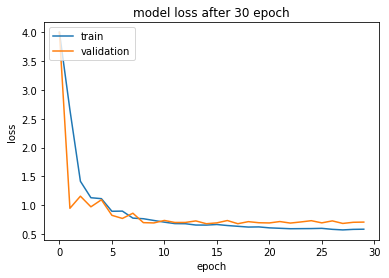

In [38]:
plt.plot(train.history['loss'])
plt.plot(train.history['val_loss'])
plt.title('model loss after 30 epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()